## EfficientNetV2 Medium - middle exposure

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
fold_preds = pd.read_csv("preds.csv")
y_true = pd.read_csv("test_set_files.csv")
  
print("Accuracy score pr fold")    
for i in range(0,10):
  if i == 5: print("")
  print(accuracy_score(fold_preds[str(i)].round().astype('int'), y_true.age) , end = ', ')
print("")

print("MSE pr fold")    
for i in range(0,10):
  if i == 5: print("")
  print(mean_squared_error(fold_preds[str(i)], y_true.age), end = ', ') 
print("")
  
aggregate_pred = fold_preds['0']
for i in range(1,10):
  aggregate_pred += fold_preds[str(i)]

aggregate_pred = aggregate_pred/10.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate_pred, y_true.age) ))


Accuracy score pr fold
0.6873786407766991, 0.6757281553398058, 0.683495145631068, 0.7106796116504854, 0.7009708737864078, 
0.7048543689320388, 0.6990291262135923, 0.683495145631068, 0.6990291262135923, 0.6601941747572816, 
MSE pr fold
0.3213496256030906, 0.3765477349974717, 0.3317787046957071, 0.2848554733474878, 0.28457994675059795, 
0.3254396787970704, 0.3107698348896557, 0.3481675475700843, 0.29518738573095393, 0.37277993194640846, 
aggregate accuracy, mse
0.7242718446601941 0.29181617978158675


### Boxplot of prediction pr age class

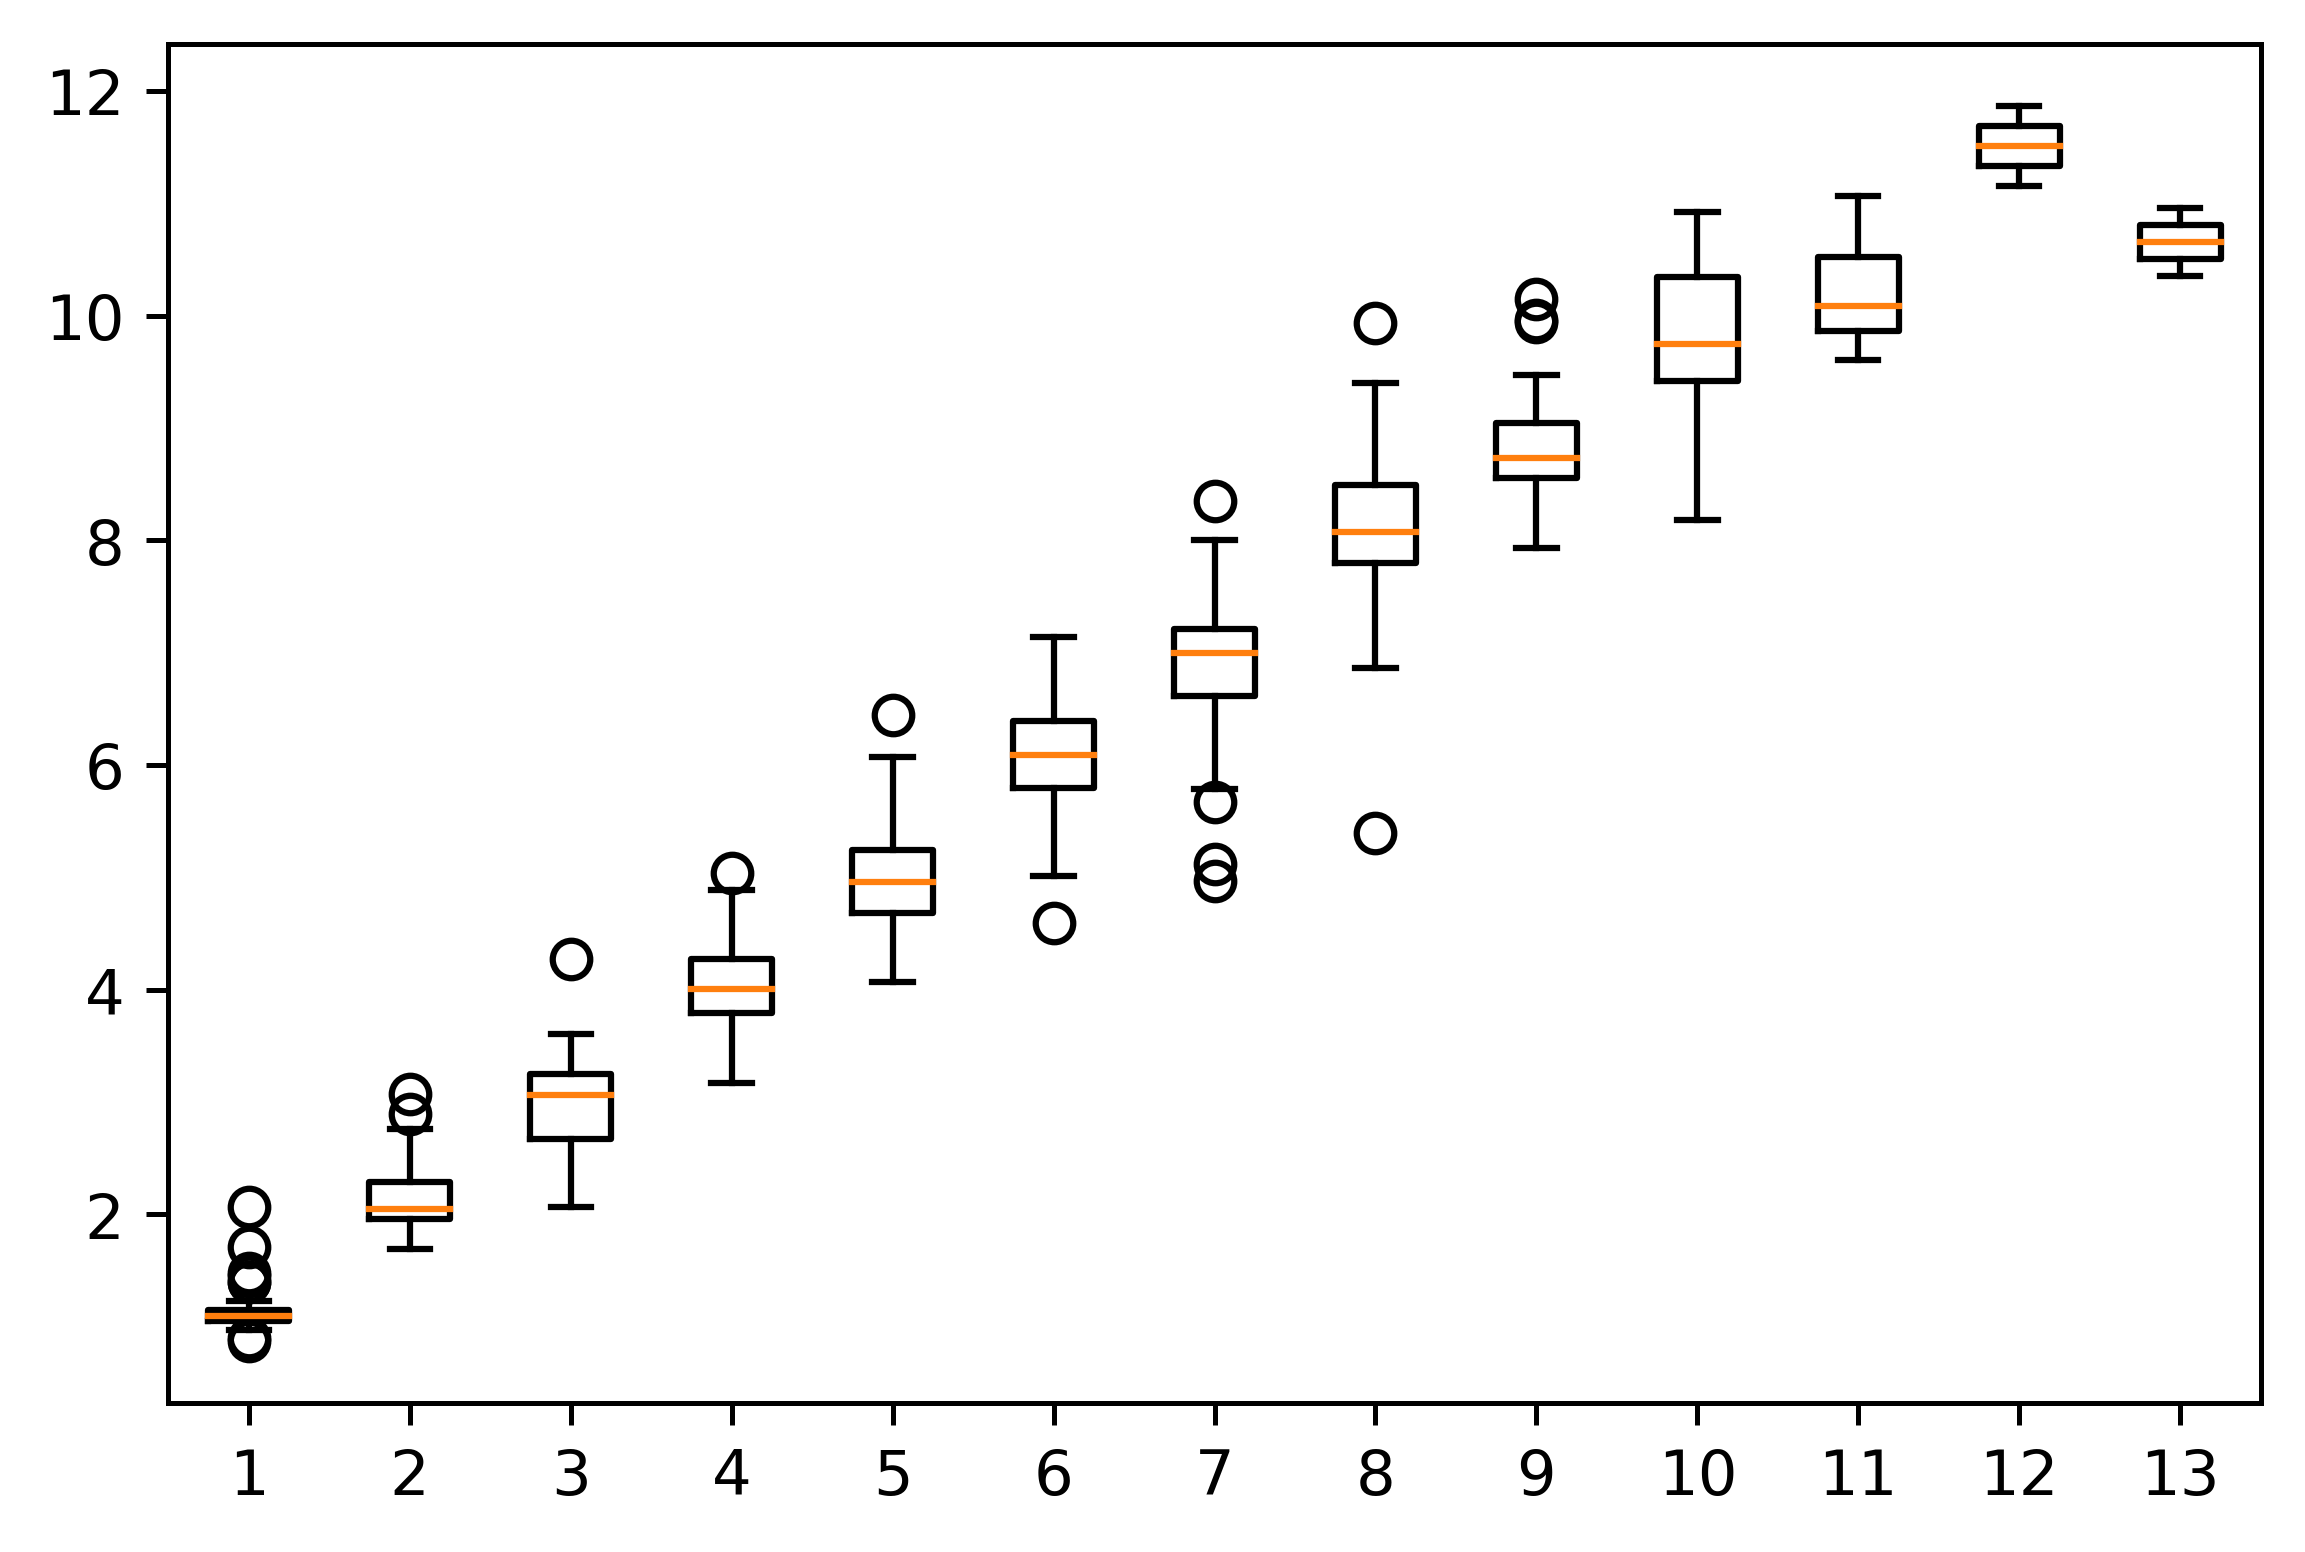

In [3]:
plt.rcParams['figure.dpi'] = 450
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] )

plt.boxplot(pr_age_group)
plt.show()


### Residual plot per age group

The predictions show heteroskedasticity:
heteroskedasticity happens when the standard deviations of a predicted variable, monitored over different values of an independent variable or as related to prior time periods, are non-constant.

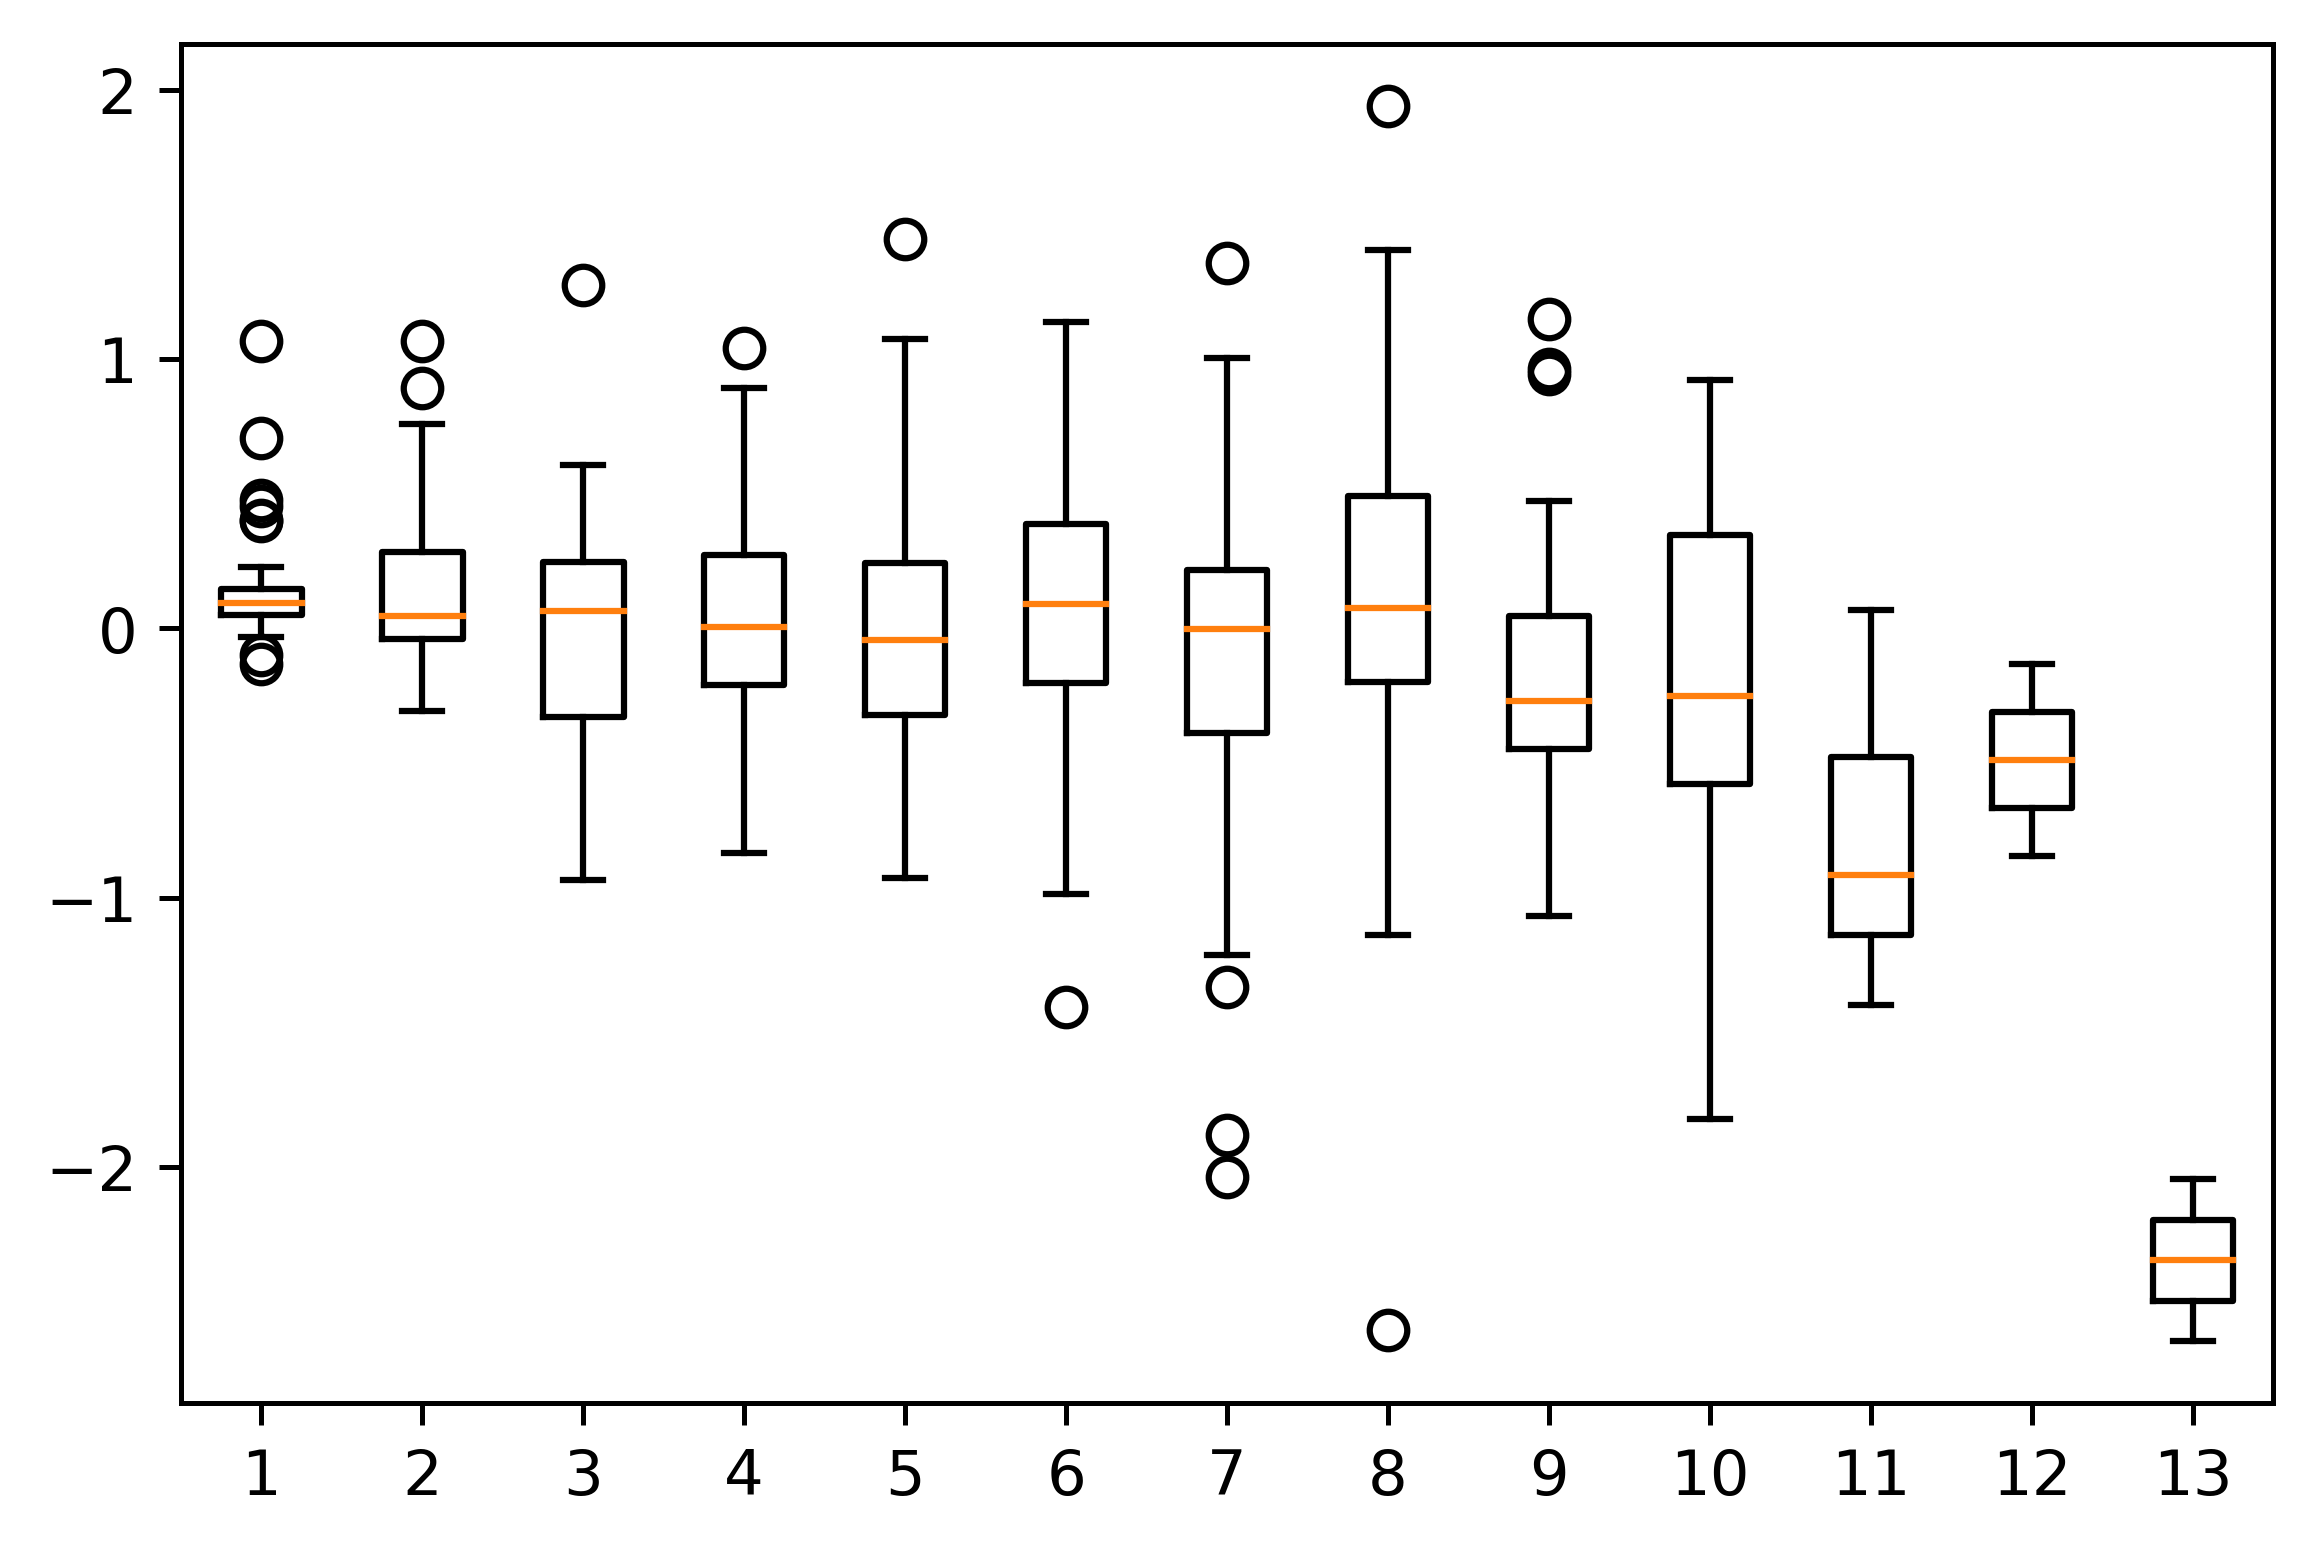

In [4]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(pr_age_group)
plt.show()

### Box plot of mode error summarized over all age groups, and summary statistics

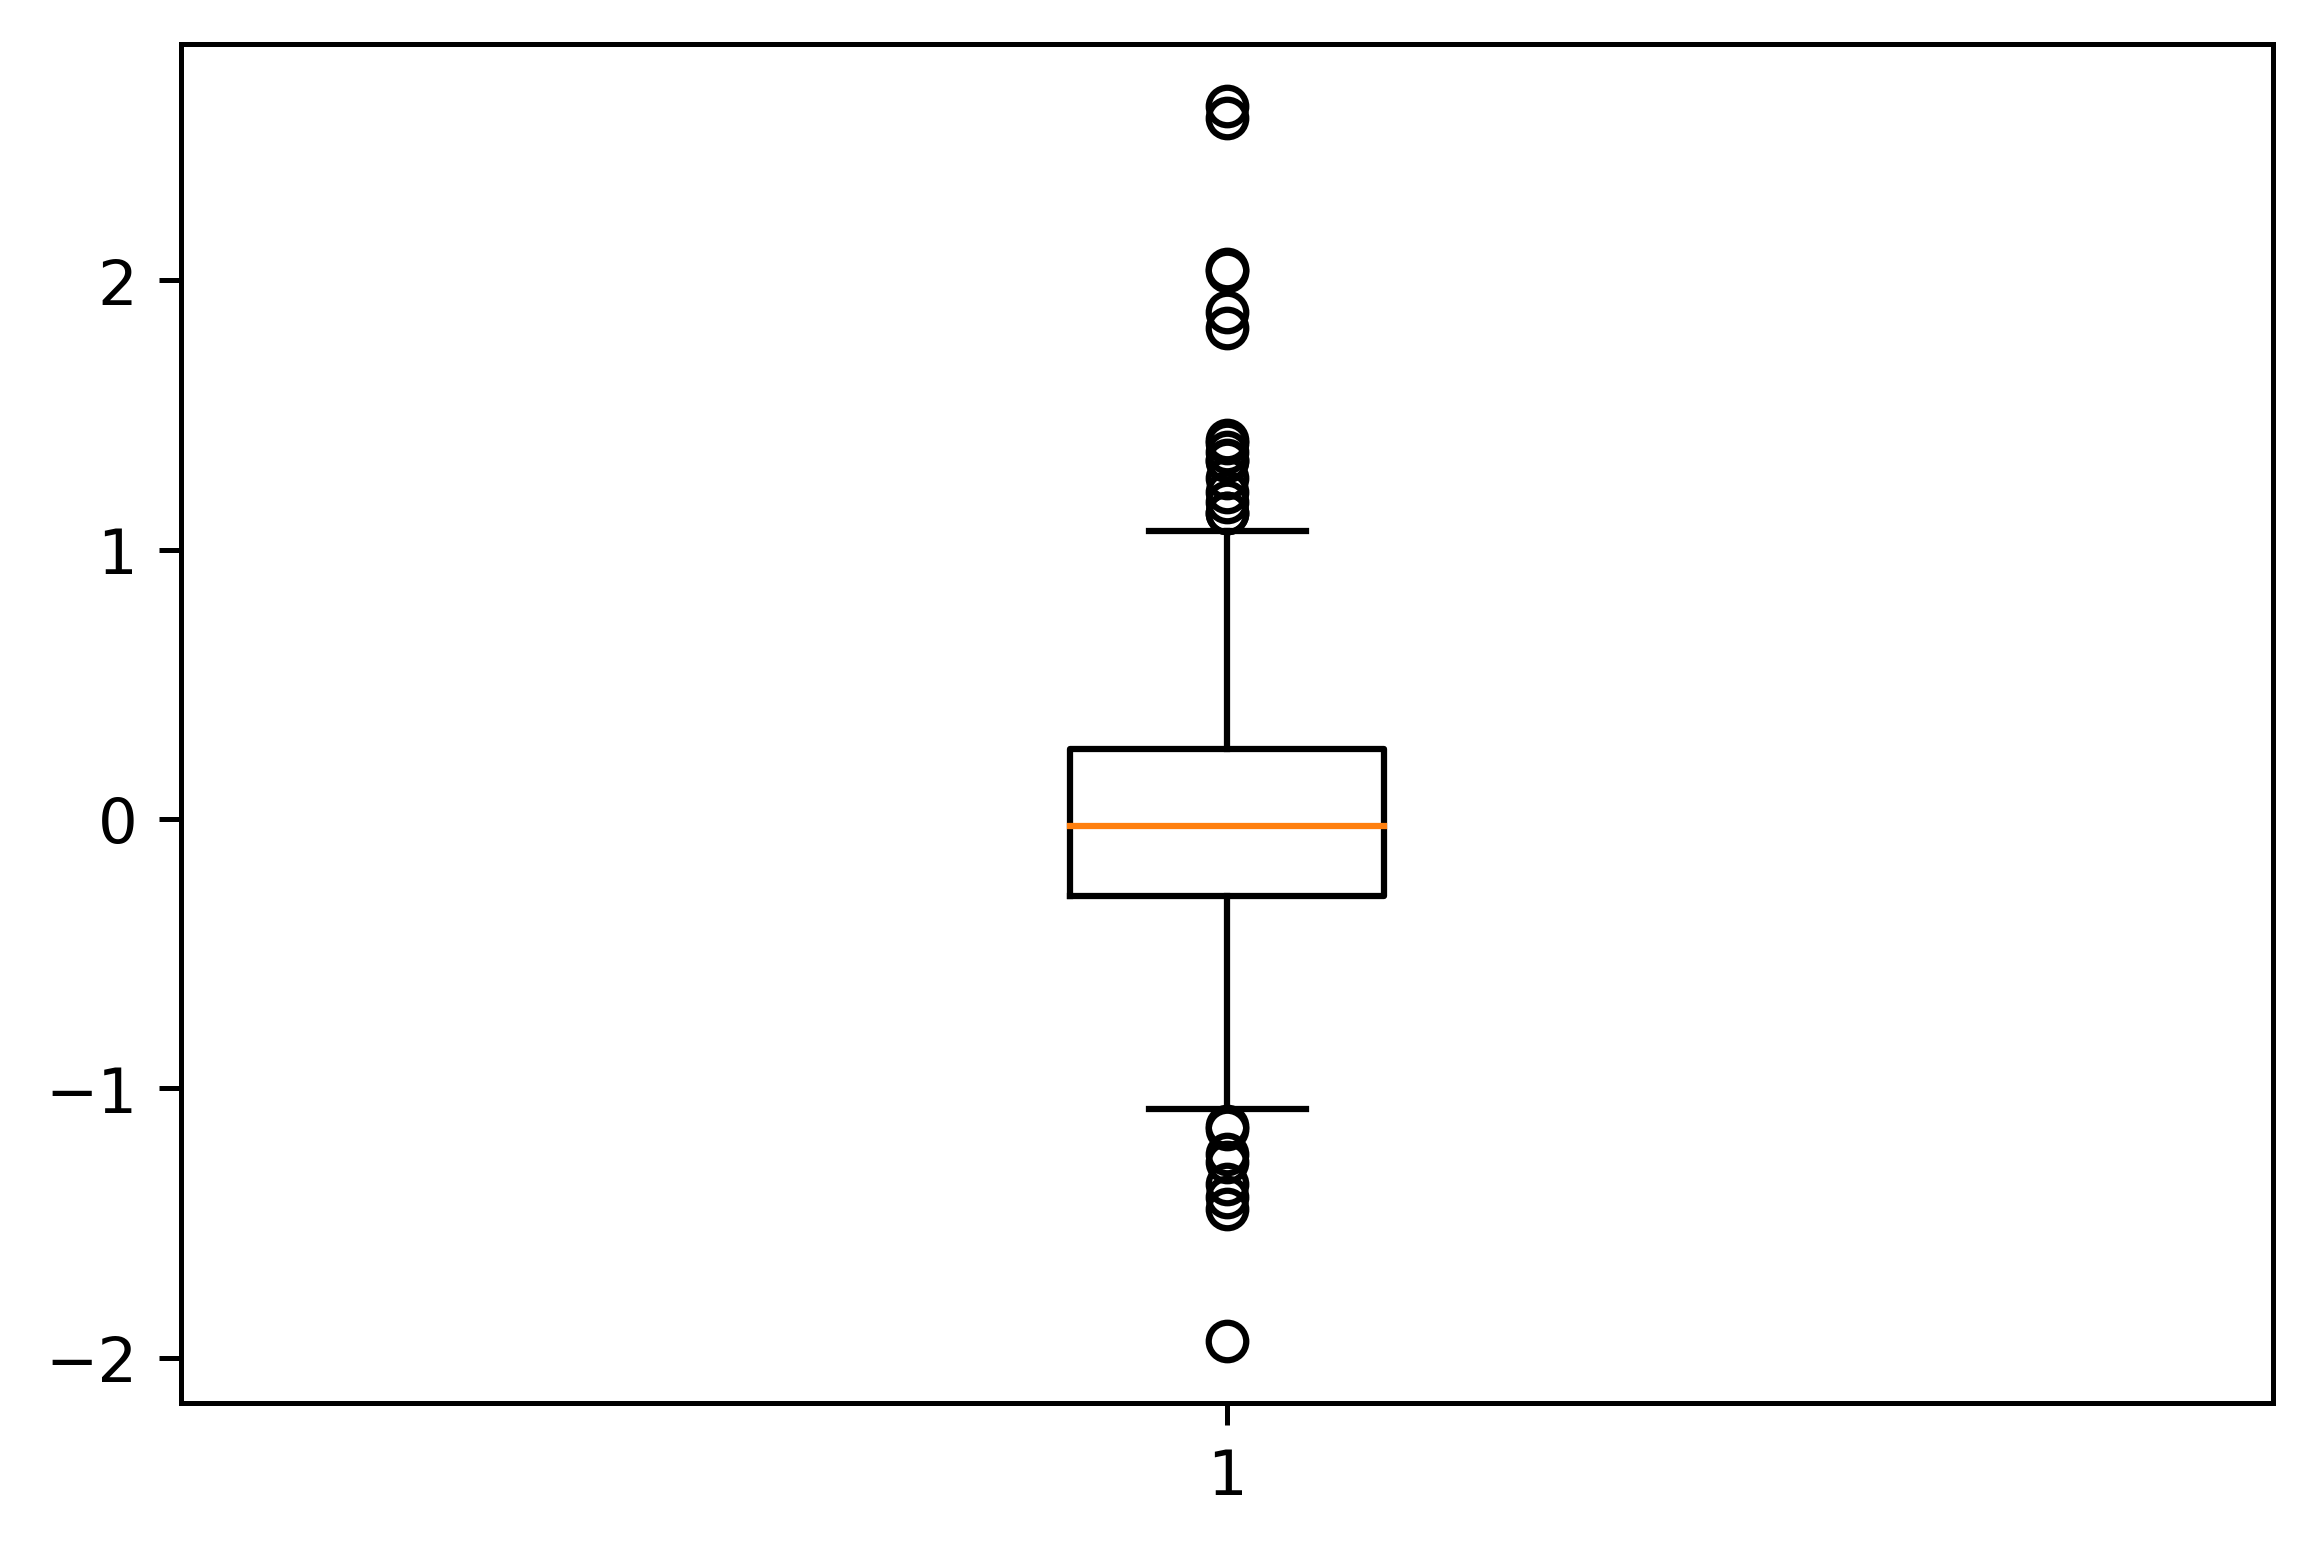

,0
count,515.000000
mean,0.011365
std,0.540606
min,-1.939247
25%,-0.284032
50%,-0.026677
75%,0.259814
max,2.646767


In [5]:
x = y_true.age.values
y = aggregate_pred.values
errors = x-y
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(errors)
plt.show()


df_describe = pd.DataFrame(errors)
df_describe.describe()

### Scatterplot error predictions after rounding

-2.0359066963195804
71
/gpfs/gpfs0/deep/data/Savannah_Professional_Practice2021_08_12_2021/CodOtholiths-MachineLearning/Savannah_Professional_Practice/2014/70111/Nr12_age07/IMG_0229.JPG
-1.880846309661865
362
/gpfs/gpfs0/deep/data/Savannah_Professional_Practice2021_08_12_2021/CodOtholiths-MachineLearning/Savannah_Professional_Practice/2016/70077/Nr06_age07/IMG_0367.JPG
1.9392471313476562
279
/gpfs/gpfs0/deep/data/Savannah_Professional_Practice2021_08_12_2021/CodOtholiths-MachineLearning/Savannah_Professional_Practice/2016/71008/Nr07_age08/IMG_0037.JPG
-2.602426767349243
423
/gpfs/gpfs0/deep/data/Savannah_Professional_Practice2021_08_12_2021/CodOtholiths-MachineLearning/Savannah_Professional_Practice/2015/70014/Nr01_age08/IMG_0001.JPG
-1.8215097904205315
369
/gpfs/gpfs0/deep/data/Savannah_Professional_Practice2021_08_12_2021/CodOtholiths-MachineLearning/Savannah_Professional_Practice/2018/71016/Nr05_age10/IMG_0121.JPG
-2.043622398376465
92
/gpfs/gpfs0/deep/data/Savannah_Professional_Pra

errors in [0.5, 1.5):  135
errors in [1.5, \inf): 7
Total missclassification errors:142


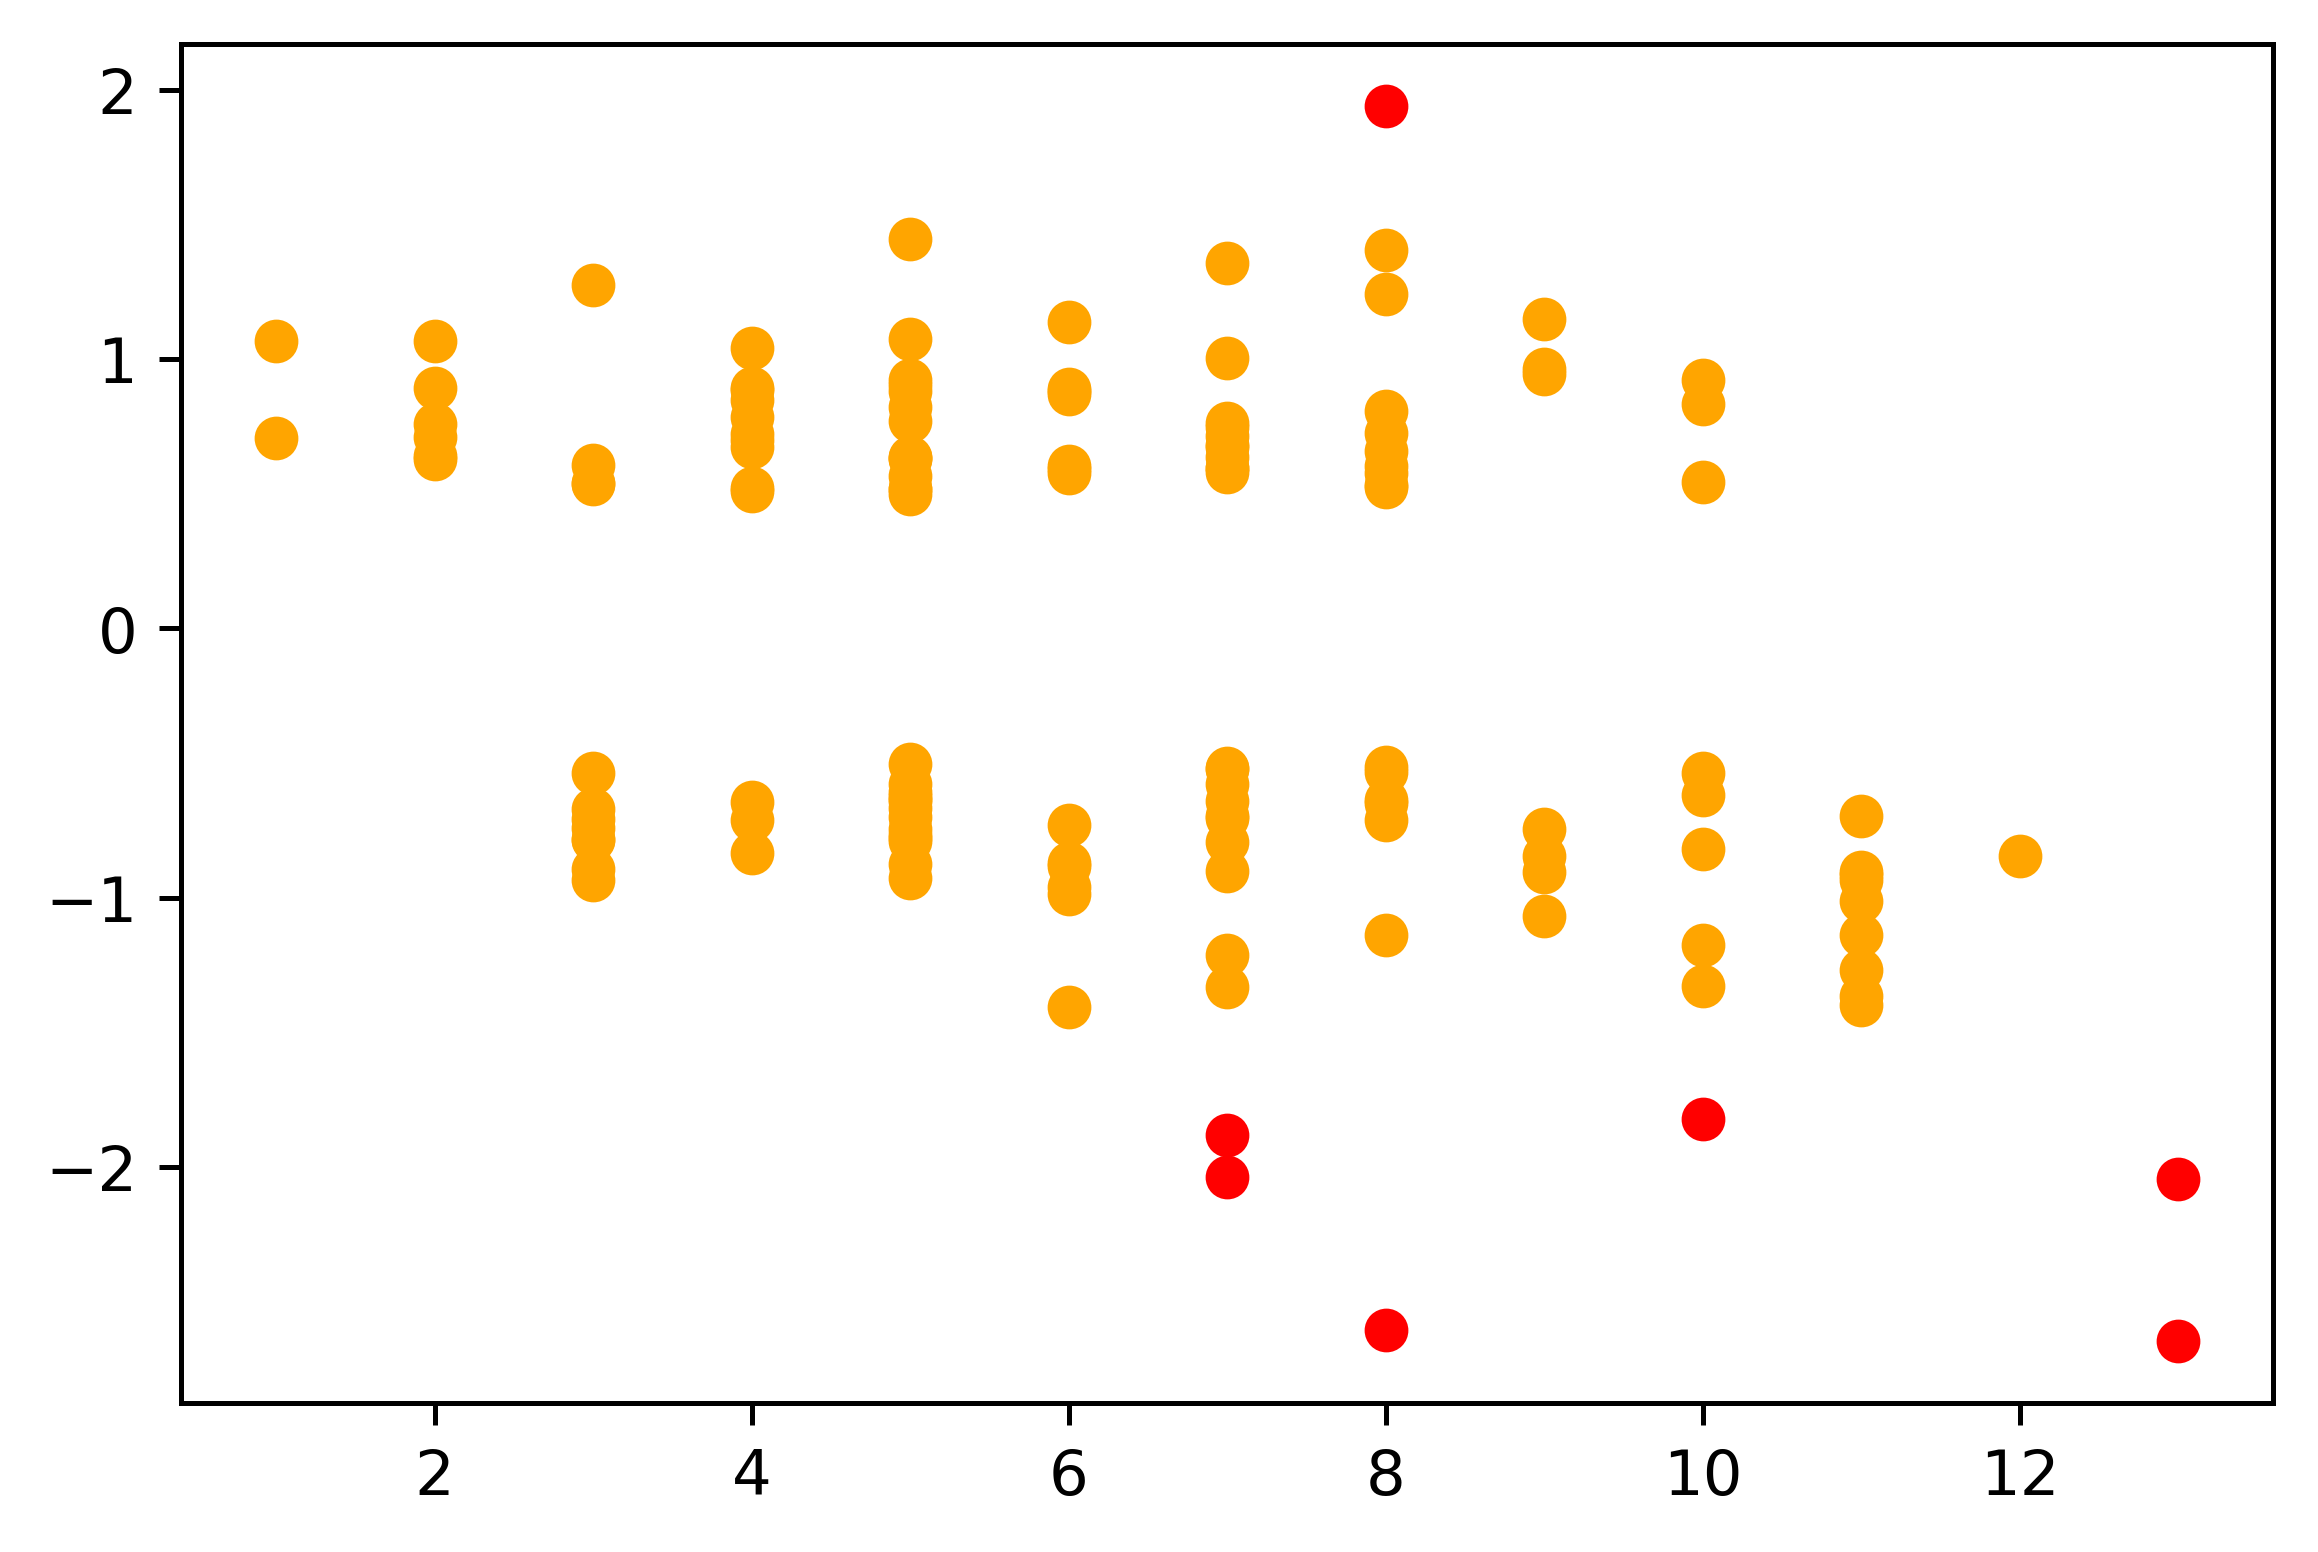

In [6]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
all_rounding_err1 = []
all_rounding_err2 = []
for i in age_range:
    age_idx = np.where(x == i)
    errors = y[age_idx] - i
    errors1 = errors[(np.abs(errors) >= 0.5) & (np.abs(errors) < 1.5)]
    x_axis = [i]*len(errors1)
    plt.scatter(x_axis, errors1, color="orange")
    
    errors2 = errors[np.abs(errors) >= 1.5 ]
    x_axis = [i]*len(errors2)
    plt.scatter(x_axis, errors2, color="red")
    all_rounding_err1.append(errors1)
    all_rounding_err2.append(errors2)
    

flat_list = [item for sublist in all_rounding_err1 for item in sublist]   
oneError = len(flat_list)
print("errors in [0.5, 1.5):  "+ str( oneError ) )

flat_list = [item for sublist in all_rounding_err2 for item in sublist]    
twoOrMore = len(flat_list)
print("errors in [1.5, \inf): "+ str( twoOrMore ) )
print("Total missclassification errors:"+str(oneError+twoOrMore))

plt.show()


### Excluding min/max prediction by fold pr prediction

In [97]:
all_preds = pd.DataFrame()
for i in range(1,10):
  all_preds[str(i)] = fold_preds[str(i)]

all_preds.head()
all_preds['new_pred'] =0.0
for index, row in all_preds.iterrows():
    mask = np.logical_or(row == row.max(), row == row.min())
    #print(mask)
    #print(row)
    row_masked = np.ma.masked_array(row, mask = mask)
    #print(row_masked)
    all_preds['new_pred'].iloc[index] = row_masked.mean()
    
all_preds.head()

print("aggregate accuracy, mse")
print(str( accuracy_score(all_preds.new_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(all_preds.new_pred, y_true.age) ))

aggregate accuracy, mse
0.7242718446601941 0.2952896305252262


In [71]:
```{toggle}

print(pr_age_group[0])
print(np.mean(pr_age_group[0]))
print(np.std(pr_age_group[0]))
print("DDDD")
print(np.percentile(pr_age_group[0], 25) )
print(np.percentile(pr_age_group[0], 50) )
print(np.percentile(pr_age_group[0], 75) )

q1 = np.percentile(pr_age_group[0], 25)
q3 = np.percentile(pr_age_group[0], 75)
print("DDDDDD")
print(len(pr_age_group[0]))
for j in range(len(pr_age_group[0])):
    if pr_age_group[0][j] < q1 or pr_age_group[0][j] > q3:
        print(pr_age_group[0][j])
        
```        

SyntaxError: invalid syntax (<ipython-input-71-e0fdfa07c007>, line 1)

### Summary over all models

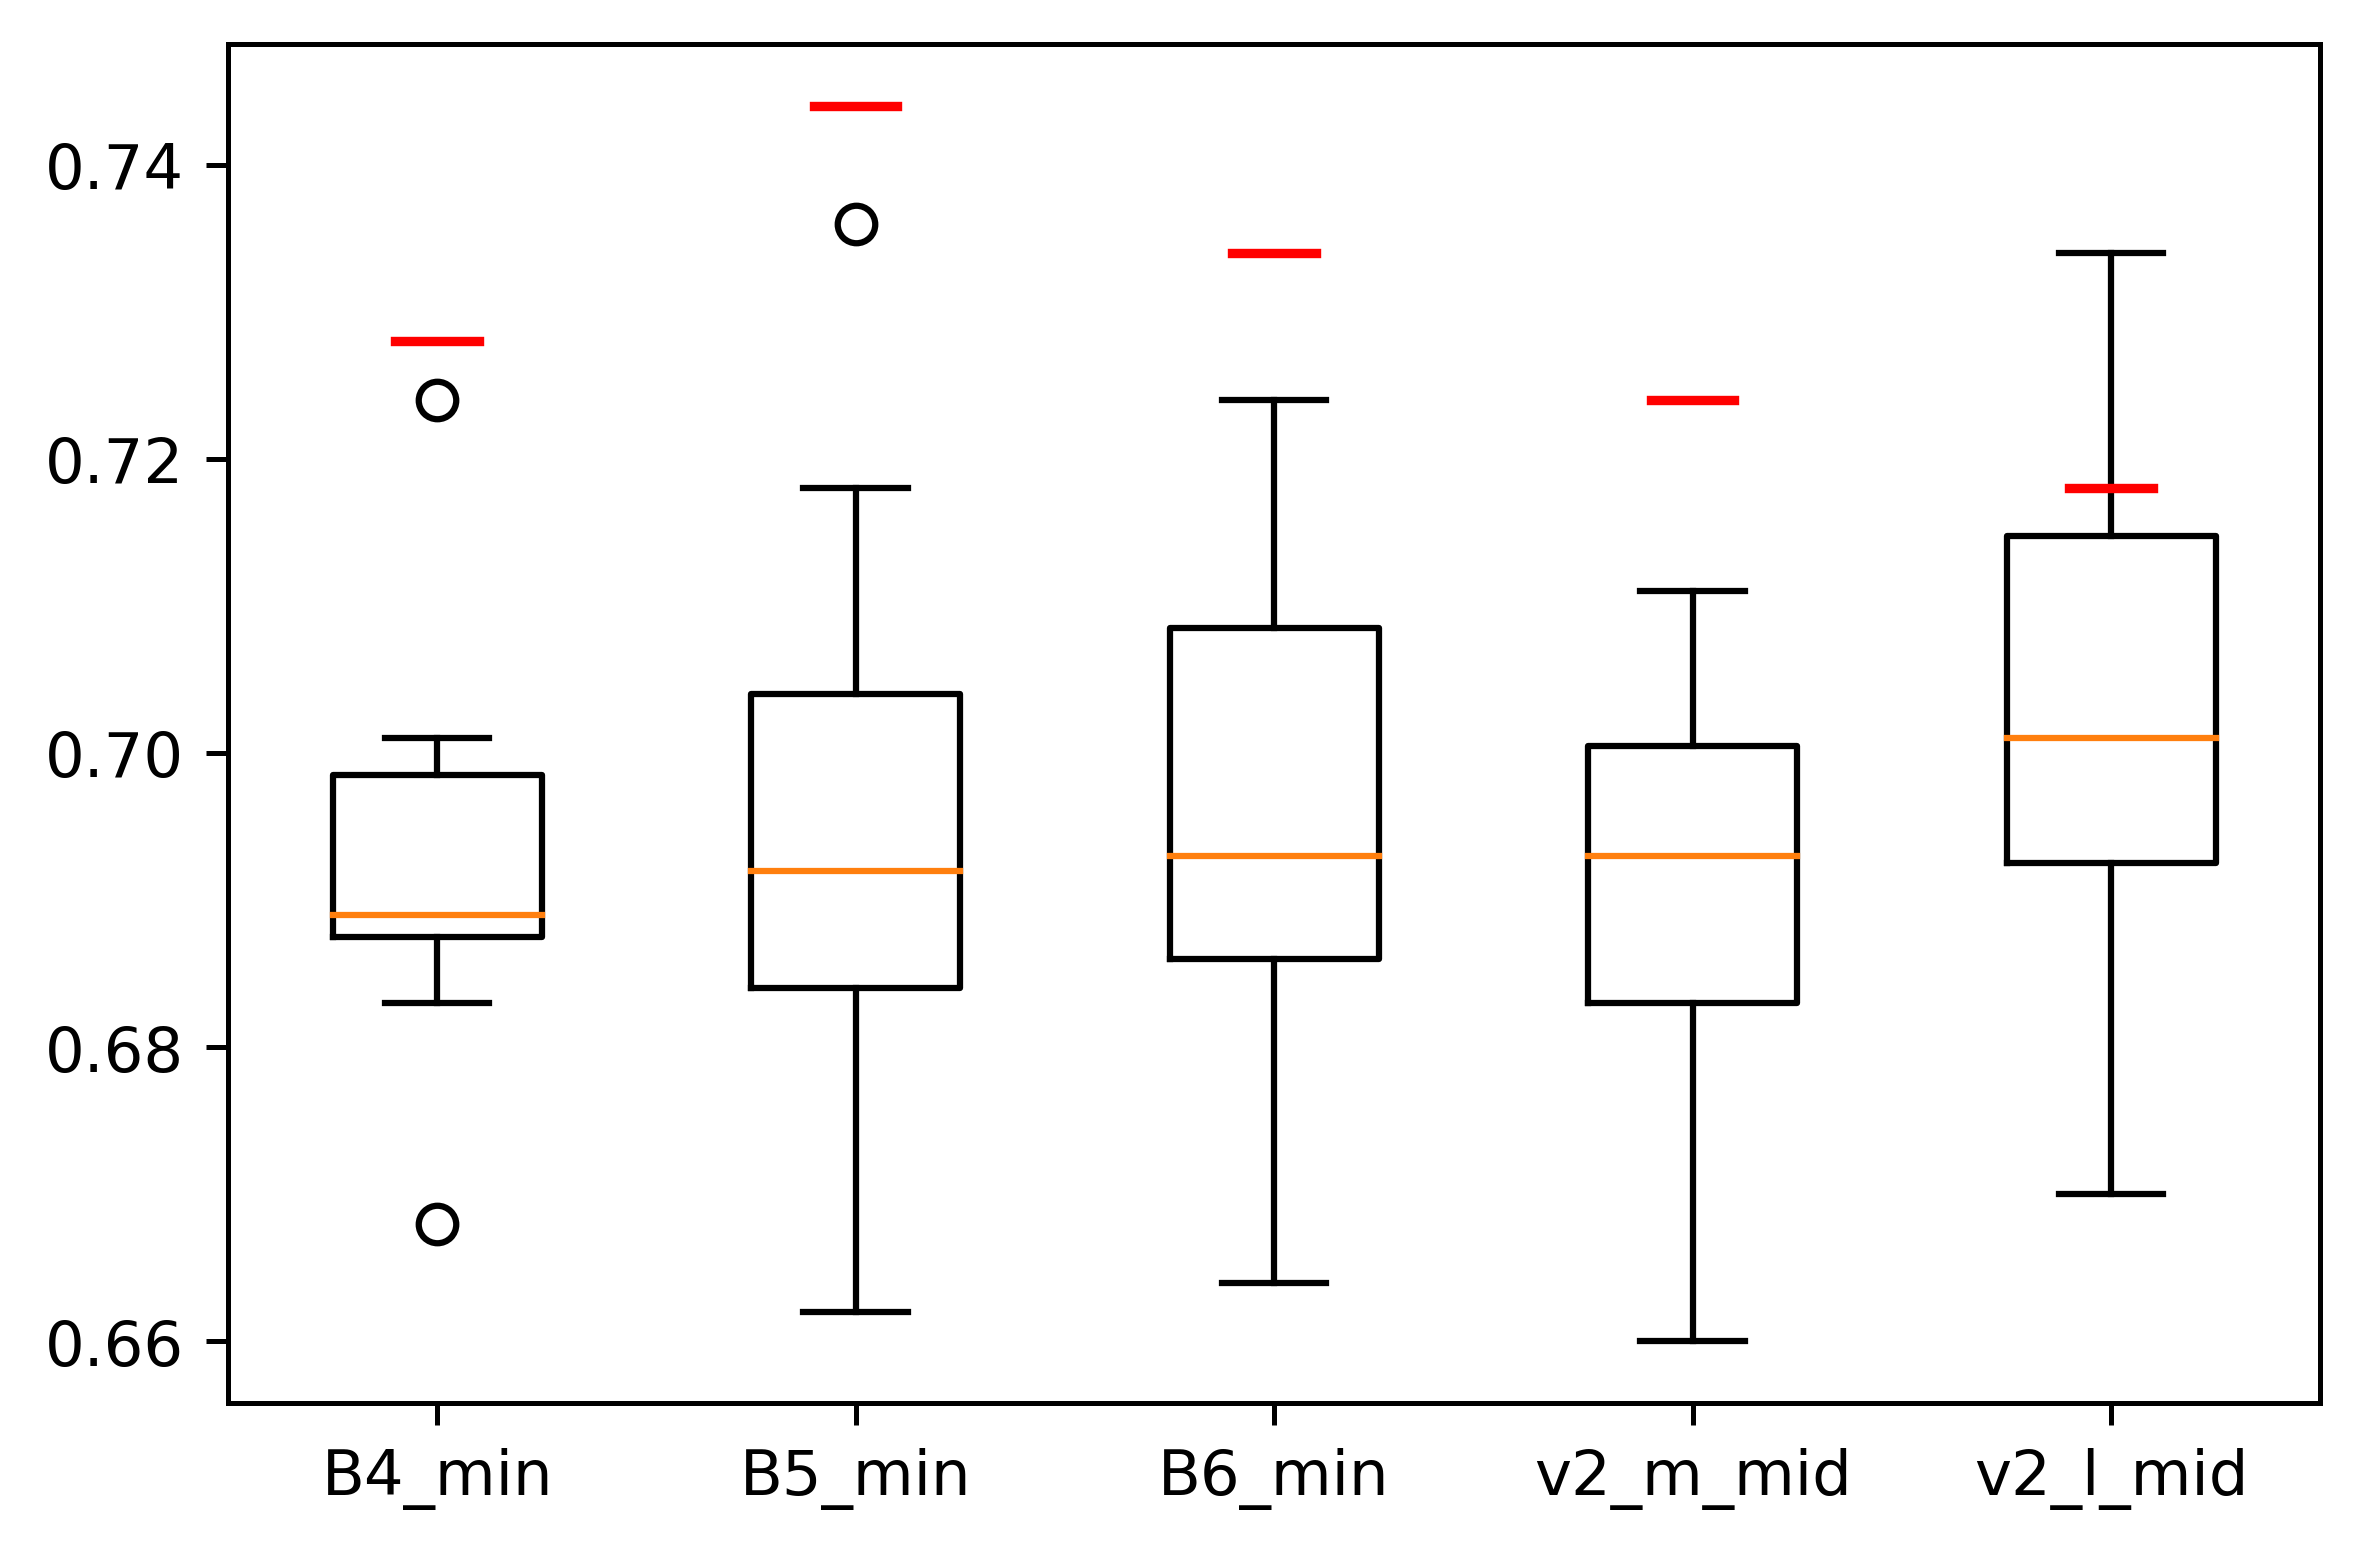

In [199]:
v2_m_middle_acc = [0.687,0.676,0.683,0.711,0.701,0.705,0.699,0.683,0.699,0.660]
v2_m_middle_mse = [0.321,0.377,0.332,0.285,0.285,0.325,0.311,0.348,0.295,0.373,]
v2_m_middle_mean_mse =0.292 
v2_m_middle_mean_acc = 0.724

v2_l_middle_acc = [0.697,0.734,0.691,0.670,0.718,0.699,0.726,0.682,0.705,0.703]
v2_l_middle_mse = [0.301,0.281,0.299,0.318,0.282,0.305,0.280,0.334,0.300,0.310,]
v2_l_middle_mean_mse =  0.280
v2_l_middle_mean_acc = 0.718


b4_min_acc = [0.699,0.689,0.687,0.683,0.689,0.701,0.697,0.668,0.689,0.724]
b4_min_mse = [0.320,0.318,0.306,0.313,0.322,0.314,0.315,0.316,0.306,0.302]
b4_min_mean_mse = 0.277
b4_min_mean_acc = 0.728

b5_min_acc = [0.718,0.691,0.693,0.668,0.736,0.707,0.662,0.683,0.695,0.687]
b5_min_mse = [0.324,0.322,0.325,0.336,0.291,0.314,0.320,0.331,0.3298,0.317]
b5_min_mean_mse = 0.277
b5_min_mean_acc = 0.744

b6_min_acc = [0.683,0.685,0.664,0.724,0.707,0.709,0.693,0.693,0.720,0.689]
b6_min_mse = [0.325,0.329,0.334,0.293,0.312,0.290,0.320,0.306,0.276,0.300,]
b6_min_mean_mse = 0.272
b6_min_mean_acc = 0.734


plt.boxplot([b4_min_acc, b5_min_acc, b6_min_acc, v2_m_middle_acc,v2_l_middle_acc])
plt.plot([0.9, 1.1], [b4_min_mean_acc,b4_min_mean_acc], 'r')
plt.plot([1.9, 2.1], [b5_min_mean_acc,b5_min_mean_acc], 'r')
plt.plot([2.9, 3.1], [b6_min_mean_acc,b6_min_mean_acc], 'r')
plt.plot([3.9, 4.1], [v2_m_middle_mean_acc,v2_m_middle_mean_acc], 'r')
plt.plot([4.9, 5.1], [v2_l_middle_mean_acc,v2_l_middle_mean_acc], 'r')
plt.xticks(range(1,6), ['B4_min', 'B5_min', 'B6_min', 'v2_m_mid', 'v2_l_mid'])

plt.show()


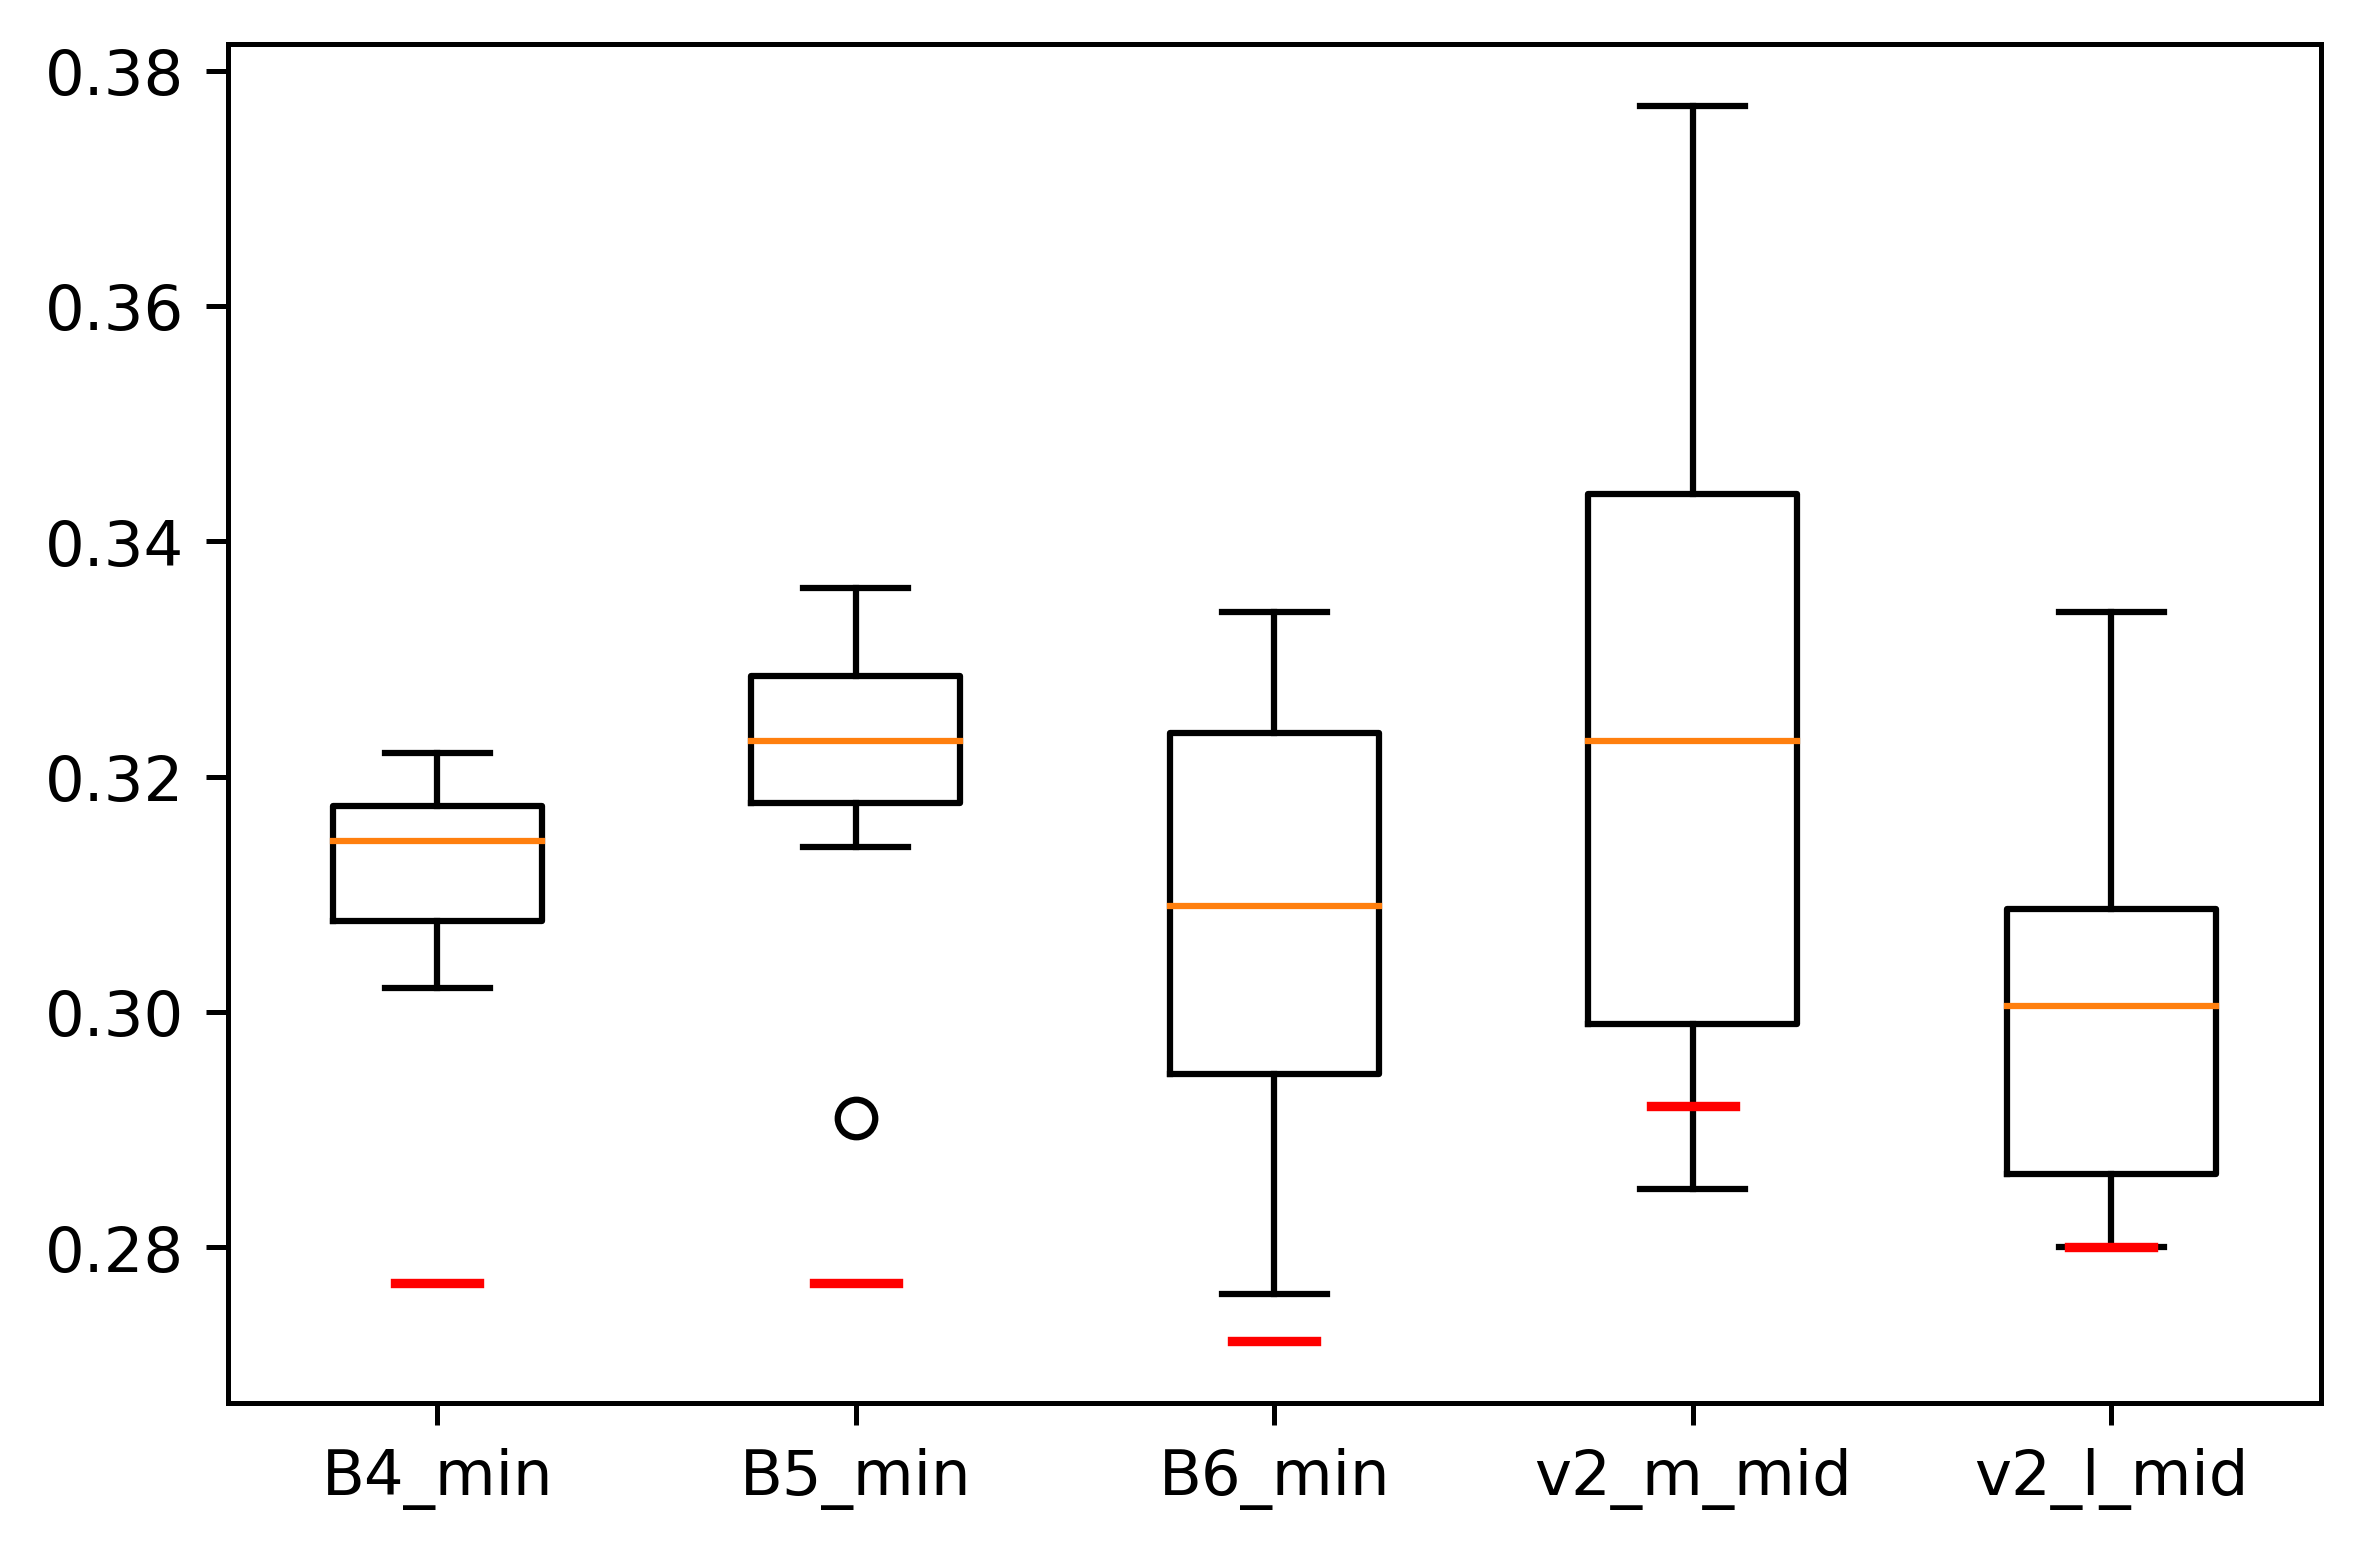

In [200]:
plt.boxplot([b4_min_mse, b5_min_mse, b6_min_mse, v2_m_middle_mse,v2_l_middle_mse])
plt.plot([0.9, 1.1], [b4_min_mean_mse,b4_min_mean_mse], 'r')
plt.plot([1.9, 2.1], [b5_min_mean_mse,b5_min_mean_mse], 'r')
plt.plot([2.9, 3.1], [b6_min_mean_mse,b6_min_mean_mse], 'r')
plt.plot([3.9, 4.1], [v2_m_middle_mean_mse,v2_m_middle_mean_mse], 'r')
plt.plot([4.9, 5.1], [v2_l_middle_mean_mse,v2_l_middle_mean_mse], 'r')
plt.xticks(range(1,6), ['B4_min', 'B5_min', 'B6_min', 'v2_m_mid', 'v2_l_mid'])

plt.show()

### Outliers >= 1.5 years

In [28]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
for i in age_range:
    age_idx = np.where(x == i)
    for j in age_idx[0]:
        if np.abs( y[ j ] - i ) >= 1.5:
            print(str(y[j])+" "+str(i), end=',')
            print(j)
            #print(y_true.iloc[j].path)

4.96409330368042 7,71
5.119153690338135 7,362
9.939247131347656 8,279
5.397573232650757 8,423
8.178490209579468 10,369
10.956377601623535 13,92
10.353233051300048 13,342
